In [15]:
import numpy as np
import matplotlib.pyplot as plt
record=[]
for i in [3,5,10]:
    data=[]
    for j in range(i):
        data.append(np.load("data/"+str(i)+"_0.1_"+str(j)+"_0.9.npy"))
    record.append(data)
for i in [0.2,0.4]:
    data=[]
    for j in range(5):
        data.append(np.load("data/5_"+str(i)+"_"+str(j)+"_0.9.npy"))
    record.append(data)
for i in [0.8,0.7]:
    data=[]
    for j in range(5):
        data.append(np.load("data/5_0.1_"+str(j)+"_"+str(i)+".npy"))
    record.append(data)

Name=["3_1_9","5_1_9","10_1_9","5_2_9","5_4_9","5_1_8","5_1_7"]


In [18]:
def drawpicture(Data,Name):
    X=range(len(Data[0][0]))
    for i in range(len(Data)):    
        agent=Data[i]
        Title=Name[i]
        fig1 = plt.figure()
        n=len(agent)
        avgagent=sum(agent)/n
        ax1 = fig1.add_subplot(111)
        l1,=ax1.plot(X,avgagent[:,0],linewidth=0.7)
        l2,=ax1.plot(X,avgagent[:,1],linewidth=0.7)
        ax1.set_ylabel("average quantity of requests/gossips")
        ax1.set_xlabel("round")
        ax1.legend(handles=[l1,l2], labels=["sent requests","sent gossip"],  loc='best')
        title1="sentrequest|gossiptimes_"+Title
        ax1.set_title(title1)
        fig1.savefig(title1+".pdf")
        
        fig2 = plt.figure()
        ax2=fig2.add_subplot(111)
        l3,=ax2.plot(X,[d/(n-1) for d in avgagent[:,2]],linewidth=0.7)
        ax2.set_ylabel("average Gap of network view")
        ax2.legend([l3],["gap of view"],loc='best')
        ax2.set_xlabel("round")
        title2="gapnumber_"+Title
        ax2.set_title(title2)
        fig2.savefig(title2+".pdf")
        plt.show()

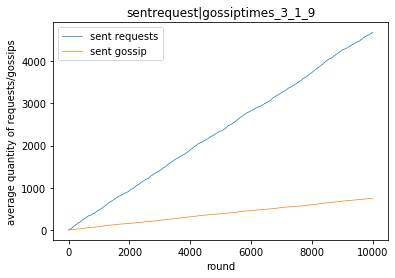

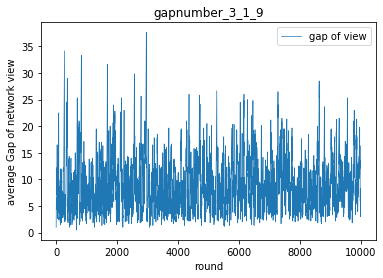

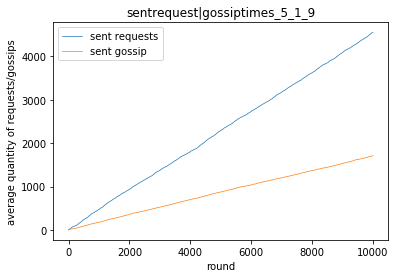

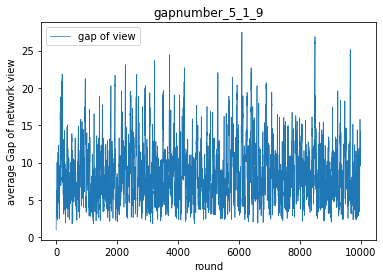

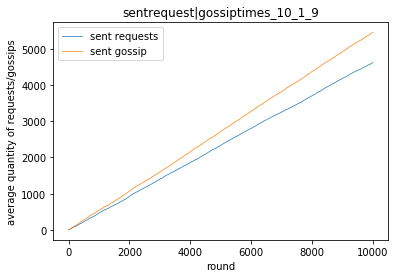

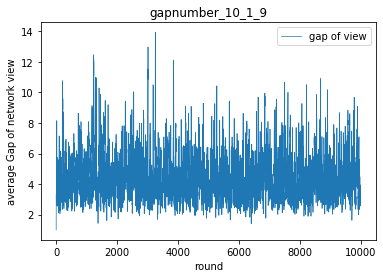

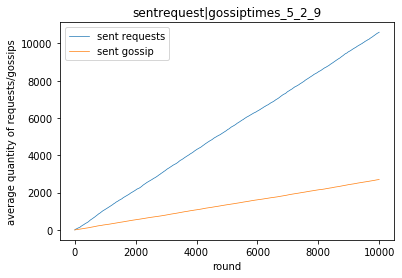

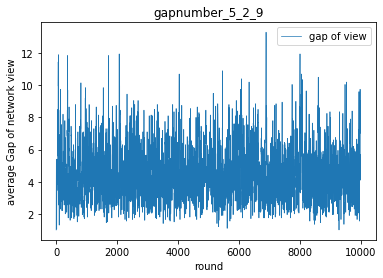

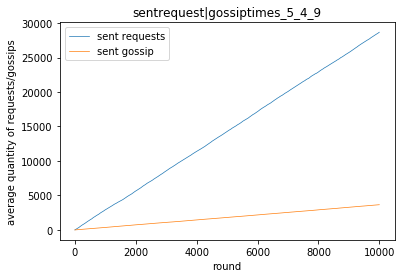

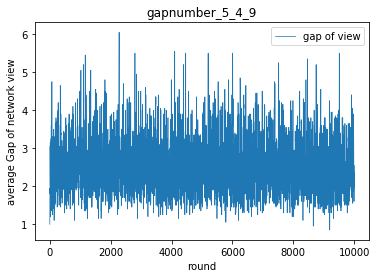

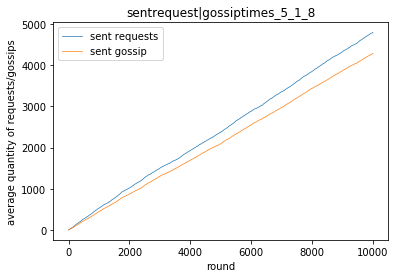

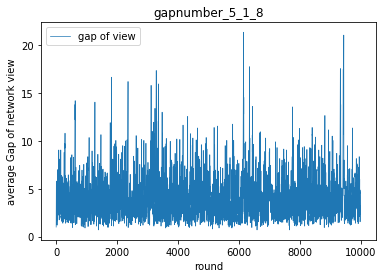

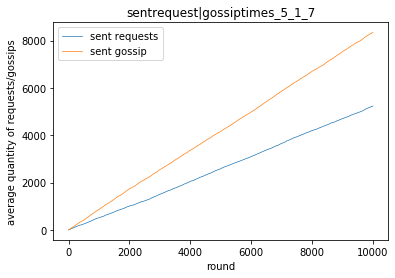

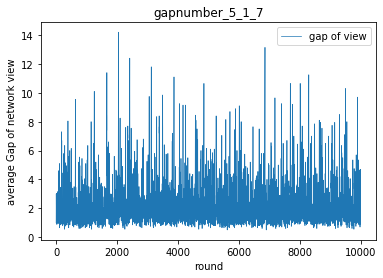

In [19]:
drawpicture(record,Name)

In [24]:
def drawavgboxbar(data,Name):
    boxes=[[d/(len(agent)-1) for d in (sum(agent)/len(agent))[:,2]] for agent in data]
    fig1 = plt.figure()
    ax1=fig1.add_subplot()
    bplot = ax1.boxplot(boxes, labels=Name, patch_artist=True,showfliers=False)
    ax1.set_title('distribution of gap of view')
    ax1.set_xlabel('parameter set')
    ax1.set_ylabel('gap of view')
    fig1.savefig("distribution_of_gap_of_view.pdf")
    fig1.show()
    
    bar1=[max((sum(agent)/len(agent))[:,0]) for agent in data]
    bar2=[max((sum(agent)/len(agent))[:,1]) for agent in data]
    fig2=plt.figure()
    ax2=fig2.add_subplot()
    x=range(len(Name))
    rects1 = ax2.bar(x, height=bar1, width=0.4, alpha=0.8, color='coral', label="sent request")
    rects2 = ax2.bar([i + 0.4 for i in x], height=bar2, width=0.4, color='skyblue', label="sent gossip")
    plt.xticks([index + 0.2 for index in x], Name)
    ax2.set_title('Maximum_sent_gossip_and_request')
    ax2.set_xlabel('parameter set')
    ax2.set_ylabel('quantity')
    ax2.legend()
    fig2.savefig("Maximum_sent_gossip_and_request.pdf")
    fig2.show()

    

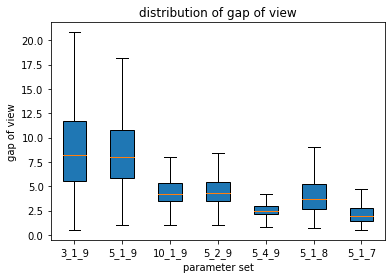

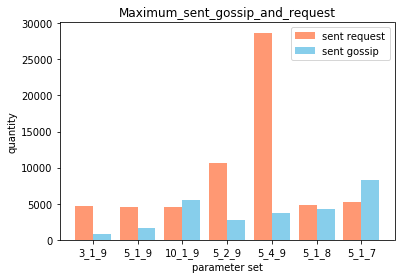

In [25]:
drawavgboxbar(record,Name)